# Fair Machine Learning for Rice Grain Identification


A project by **Aung Thu Hein - GH1032484**

<span style="font-size: 12px;">
<strong>GitHub Repository</strong>
<a href="https://github.com/agthuhein/RiceEthicalIssues.git">
Click here to view my GitHub repo
</a>
</span>



<p align="center">
  <img src="cover.jpg" width="65%">
</p>


## Project Overview

This project looks into how machine learning can be used to determine the classification of rice grain varieties (the Cammeo rice variety vs the Osmancik rice variety). We want to build an effective rice variety classification system using visual/physical characteristics, and to analyse any potential bias (and/or unfair classification), that arises from the resulting classification predictions. We will analyze if certain rice samples have an increased likelihood (due to their quality, geographic origin, or environmental factors) of being misclassified and thus result in a biased belief in the model or unfair classifications of rice varieties based on visual/physical characteristics.

## Motivation

Agricultural ML decision-making must have accurate classifications and measurements in order to provide fair and reliable systems for sustainable practices that meet quality requirements, manage the supply chain, and assist farmers. Misclassifying rice varieties could result in farmers or corporations incurring financial losses, incorrect choices by buyers when purchasing the wrong variety of rice, and inequities in the way rice would have been treated had it been classified correctly. The existence of bias within either the training data or the data-collection method can disproportionately impact certain rice samples and diminish trust in automated decision-making processes. Farmers, producers, and consumers deserve fair and equitable classification models to promote transparency and equal opportunity in order to enable agricultural systems to operate efficiently and in the best interest of all stakeholders in the agricultural value chain.

## Problem Statement

The purpose of this study is to identify and reduce any possible bias when classifying Cammeo and Osmancik rice grains using machine learning technology. We specifically aim to find out whether or not there will be any difference in the classification accuracy of different samples of rice due to possible confounding variables, such as the appearance of the grain, where it came from, or how good it is. Our main objective is to identify any bias in how the algorithm classifies the different samples and implement fairness-enhancing methods to guarantee that all samples are treated fairly and thereby classified correctly. It is vital that the issue of fair treatment for all product samples is addressed to allow for continued development of reliable and trustworthy AI solutions in the agricultural industry, as it relates to trade and providing consumers with high-quality products.


#### Dataset

The dataset used in this project is the *Rice Cammeo and Osmancik* dataset, sourced from the UCI Machine Learning Repository  
([available here](https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik)).

It contains measurements such as Area, Perimeter, Major and Minor Axis lengths, Convex Area, Extent, and Eccentricity for two rice varieties: *Cammeo* and *Osmancik*.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('Rice_Classification.csv')

#### Exploratory Data Analysis (EDA) and Data Processing

In [2]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,b'Cammeo'
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,b'Cammeo'
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,b'Cammeo'
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,b'Cammeo'
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,b'Cammeo'


In [3]:
df.tail()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
3805,11441.0,415.858002,170.486771,85.756592,0.864280,11628.0,0.681012,b'Osmancik'
3806,11625.0,421.390015,167.714798,89.462570,0.845850,11904.0,0.694279,b'Osmancik'
3807,12437.0,442.498993,183.572922,86.801979,0.881144,12645.0,0.626739,b'Osmancik'
3808,9882.0,392.296997,161.193985,78.210480,0.874406,10097.0,0.659064,b'Osmancik'
3809,11434.0,404.709991,161.079269,90.868195,0.825692,11591.0,0.802949,b'Osmancik'


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   float64
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   float64
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(7), object(1)
memory usage: 238.3+ KB


In [5]:
df.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

We have no null values, so we can do our analysis.

In [6]:
# List of numerical features for univariate analysis
features = ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 
            'Eccentricity', 'Convex_Area', 'Extent']

In [7]:
# Display basic info
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())

Dataset shape: (3810, 8)
Columns: ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity', 'Convex_Area', 'Extent', 'Class']


### 1. Univariate Analysis

<h5 style="text-decoration: underline;">Area</h5>


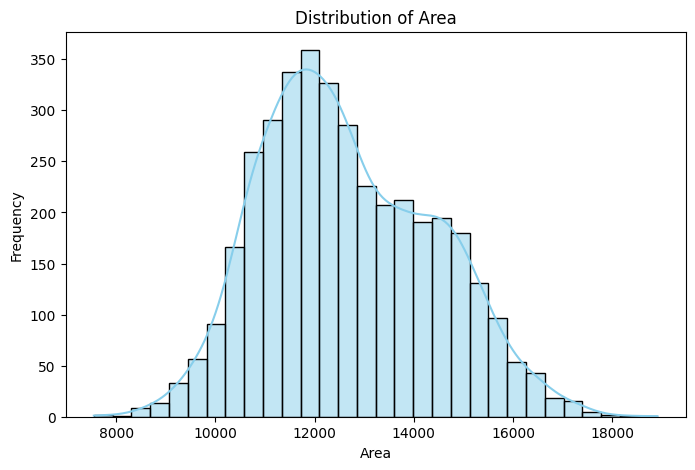

count     3810.000000
mean     12667.727559
std       1732.367706
min       7551.000000
25%      11370.500000
50%      12421.500000
75%      13950.000000
max      18913.000000
Name: Area, dtype: float64


In [8]:
# Histogram for Area
plt.figure(figsize=(8,5))
sns.histplot(df['Area'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Area')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
print(df['Area'].describe())


<h5 style="text-decoration: underline;">Perimeter</h5>


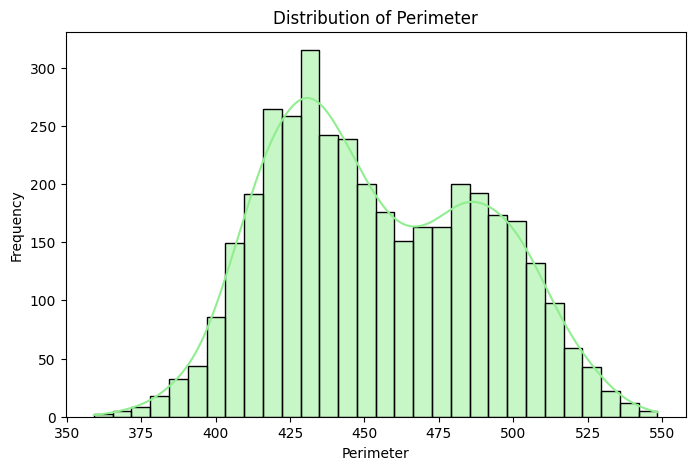

count    3810.000000
mean      454.239180
std        35.597081
min       359.100006
25%       426.144753
50%       448.852493
75%       483.683746
max       548.445984
Name: Perimeter, dtype: float64


In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df['Perimeter'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Perimeter')
plt.xlabel('Perimeter')
plt.ylabel('Frequency')
plt.show()

print(df['Perimeter'].describe())


<h5 style="text-decoration: underline;">Major_Axis_Length</h5>


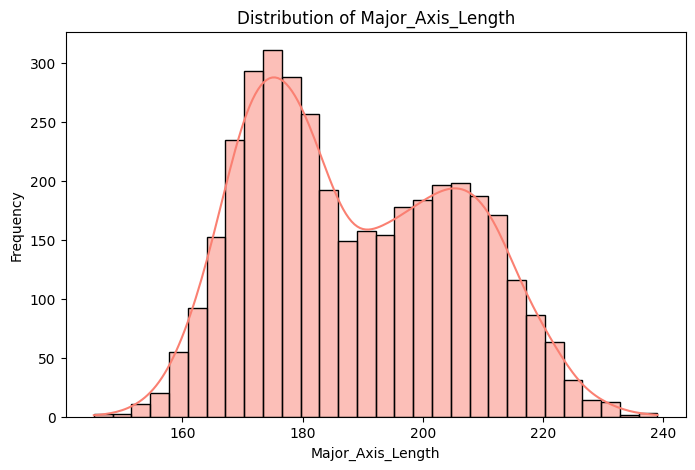

count    3810.000000
mean      188.776222
std        17.448679
min       145.264465
25%       174.353855
50%       185.810059
75%       203.550438
max       239.010498
Name: Major_Axis_Length, dtype: float64


In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df['Major_Axis_Length'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Major_Axis_Length')
plt.xlabel('Major_Axis_Length')
plt.ylabel('Frequency')
plt.show()

print(df['Major_Axis_Length'].describe())


<h5 style="text-decoration: underline;">Minor_Axis_Length</h5>


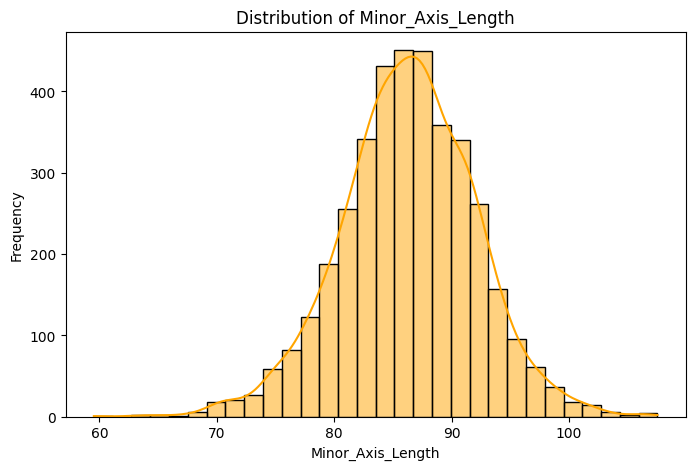

count    3810.000000
mean       86.313750
std         5.729817
min        59.532406
25%        82.731695
50%        86.434647
75%        90.143677
max       107.542450
Name: Minor_Axis_Length, dtype: float64


In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df['Minor_Axis_Length'], bins=30, kde=True, color='orange')
plt.title('Distribution of Minor_Axis_Length')
plt.xlabel('Minor_Axis_Length')
plt.ylabel('Frequency')
plt.show()

print(df['Minor_Axis_Length'].describe())


<h5 style="text-decoration: underline;">Eccentricity</h5>


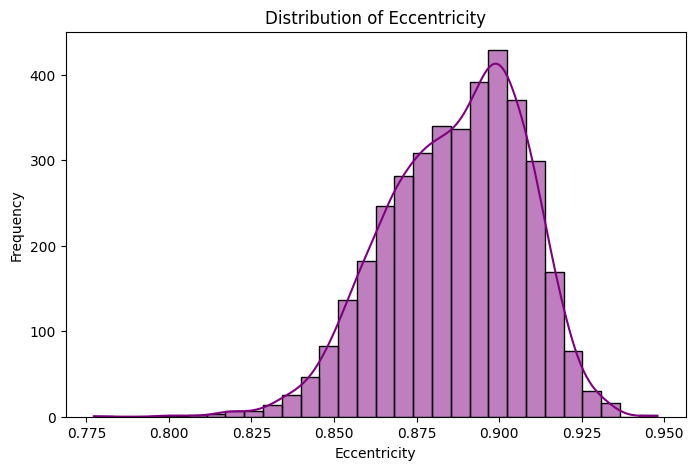

count    3810.000000
mean        0.886871
std         0.020818
min         0.777233
25%         0.872402
50%         0.889050
75%         0.902588
max         0.948007
Name: Eccentricity, dtype: float64


In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df['Eccentricity'], bins=30, kde=True, color='purple')
plt.title('Distribution of Eccentricity')
plt.xlabel('Eccentricity')
plt.ylabel('Frequency')
plt.show()

print(df['Eccentricity'].describe())


<h5 style="text-decoration: underline;">Convex_Area
</h5>


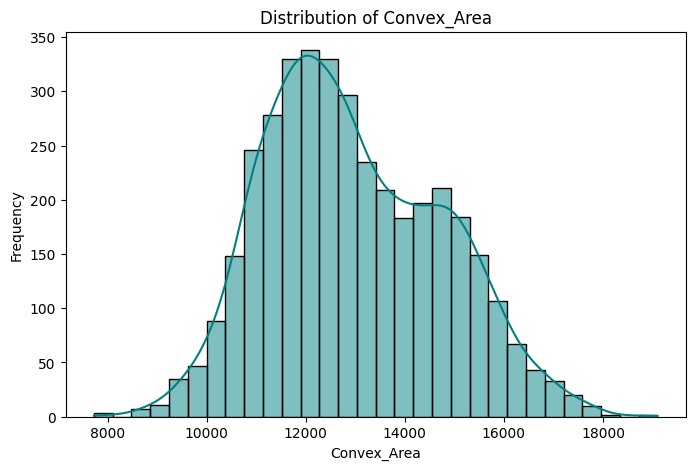

count     3810.000000
mean     12952.496850
std       1776.972042
min       7723.000000
25%      11626.250000
50%      12706.500000
75%      14284.000000
max      19099.000000
Name: Convex_Area, dtype: float64


In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df['Convex_Area'], bins=30, kde=True, color='teal')
plt.title('Distribution of Convex_Area')
plt.xlabel('Convex_Area')
plt.ylabel('Frequency')
plt.show()

print(df['Convex_Area'].describe())


<h5 style="text-decoration: underline;">Extent</h5>


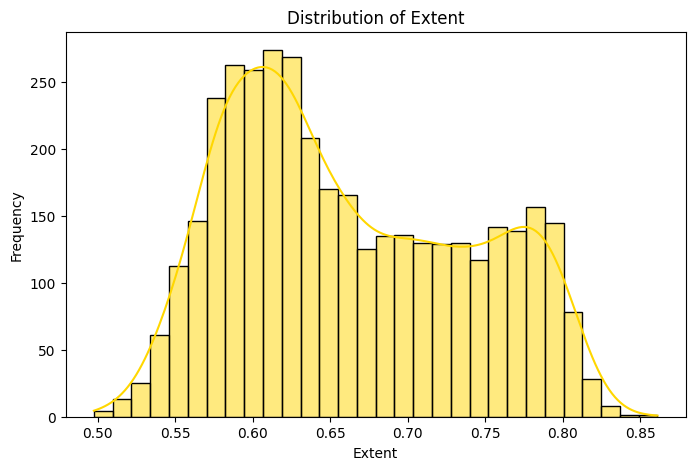

count    3810.000000
mean        0.661934
std         0.077239
min         0.497413
25%         0.598862
50%         0.645361
75%         0.726562
max         0.861050
Name: Extent, dtype: float64


In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df['Extent'], bins=30, kde=True, color='gold')
plt.title('Distribution of Extent')
plt.xlabel('Extent')
plt.ylabel('Frequency')
plt.show()

print(df['Extent'].describe())


<div style="font-size: 14px;">

### Univariate Analysis – Observations

#### **1. Area**
- The distribution is **slightly right-skewed**.  
- Most rice grains have an area between **10,000–14,000** units.  
- Few grains with larger area values exist, possibly outliers.

#### **2. Perimeter**
- The data shows **two mild peaks**, suggesting a **bimodal trend**.  
- Most perimeter values lie between **400–500** units.  
- Indicates variation among rice grain shapes.

#### **3. Major Axis Length**
- Displays **bimodal behavior**, implying **two rice categories** with different grain lengths.  
- Main concentrations around **175** and **200** units.

#### **4. Minor Axis Length**
- Appears **normally distributed**, centered around **85–90** units.  
- Suggests uniformity in grain width across samples.

#### **5. Eccentricity**
- Slightly **right-skewed** with most values near **0.9**, indicating **elongated grains**.  
- Low variation overall.

#### **6. Convex Area**
- Similar to “Area”, showing a **bell-shaped but right-skewed** pattern.  
- Concentration around **12,000–14,000** units.

#### **7. Extent**
- **Bimodal distribution**, suggesting **two shape groups**.  
- Peaks around **0.6** and **0.75**, indicating variation in grain compactness.

</div>


- **Sensitive Features:** *Area, Eccentricity*  
- **Non-Sensitive Features:** *Perimeter, Major_Axis_Length, Minor_Axis_Length, Convex_Area, Extent*  
- **Target:** *Class (Rice Variety)*


### 2. Analysis of sensitive features with target

In [15]:
# Pick a target column automatically (edit if needed)
possible_targets = ['Class','class','Label','label','Target','Variety','type']
TARGET_COL = next((c for c in possible_targets if c in df.columns), None)
assert TARGET_COL is not None, f"Please set TARGET_COL manually; none of {possible_targets} found."

SENSITIVE_FEATURES = ['Area', 'Eccentricity']  # <- adjust if you change the list

In [16]:
print("Target:", TARGET_COL)
print("Classes:", df[TARGET_COL].unique())
print(df[SENSITIVE_FEATURES + [TARGET_COL]].describe(include='all'))
print(df[SENSITIVE_FEATURES].isna().sum())


Target: Class
Classes: ["b'Cammeo'" "b'Osmancik'"]
                Area  Eccentricity        Class
count    3810.000000   3810.000000         3810
unique           NaN           NaN            2
top              NaN           NaN  b'Osmancik'
freq             NaN           NaN         2180
mean    12667.727559      0.886871          NaN
std      1732.367706      0.020818          NaN
min      7551.000000      0.777233          NaN
25%     11370.500000      0.872402          NaN
50%     12421.500000      0.889050          NaN
75%     13950.000000      0.902588          NaN
max     18913.000000      0.948007          NaN
Area            0
Eccentricity    0
dtype: int64


In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['_target_enc'] = le.fit_transform(df[TARGET_COL])
class_map = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label mapping:", class_map)
n_classes = df['_target_enc'].nunique()


Label mapping: {"b'Cammeo'": np.int64(0), "b'Osmancik'": np.int64(1)}


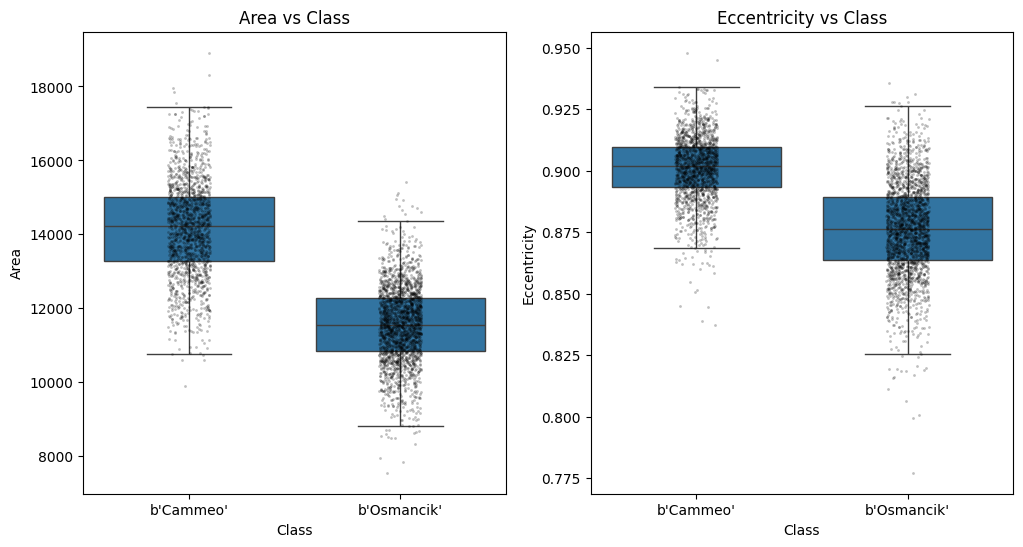

In [18]:
plt.figure(figsize=(12,6))
for i, feat in enumerate(SENSITIVE_FEATURES, start=1):
    plt.subplot(1, 2, i)
    sns.boxplot(x=TARGET_COL, y=feat, data=df, showfliers=False)
    sns.stripplot(x=TARGET_COL, y=feat, data=df, alpha=0.25, color='k', size=2)
    plt.title(f"{feat} vs {TARGET_COL}")
plt.show()

<div style="font-size:14px;">

### Analysis Results

**Area vs Class**
- The **Cammeo** variety exhibits noticeably **larger grain areas** compared to **Osmancik**.
- This indicates that **Area** is a strong discriminative feature between the two classes.
- Without fairness constraints, a model may **favor Cammeo**.

**Eccentricity vs Class**
- **Cammeo** grains show **higher eccentricity** (more elongated).
- **Osmancik** grains appear more **rounded**.
- This may introduce **model bias**.

**Summary & Fairness Implications**
- **Area** and **Eccentricity** show **clear separation**.
- They are **potential sources of bias**.
- Fairness-aware modeling is recommended.

</div>


#### 3. Relationship of non-sensitive and sensitive targets

In [19]:
NON_SENSITIVE_FEATURES = [
    'Perimeter',
    'Major_Axis_Length',
    'Minor_Axis_Length',
    'Convex_Area',
    'Extent'
]


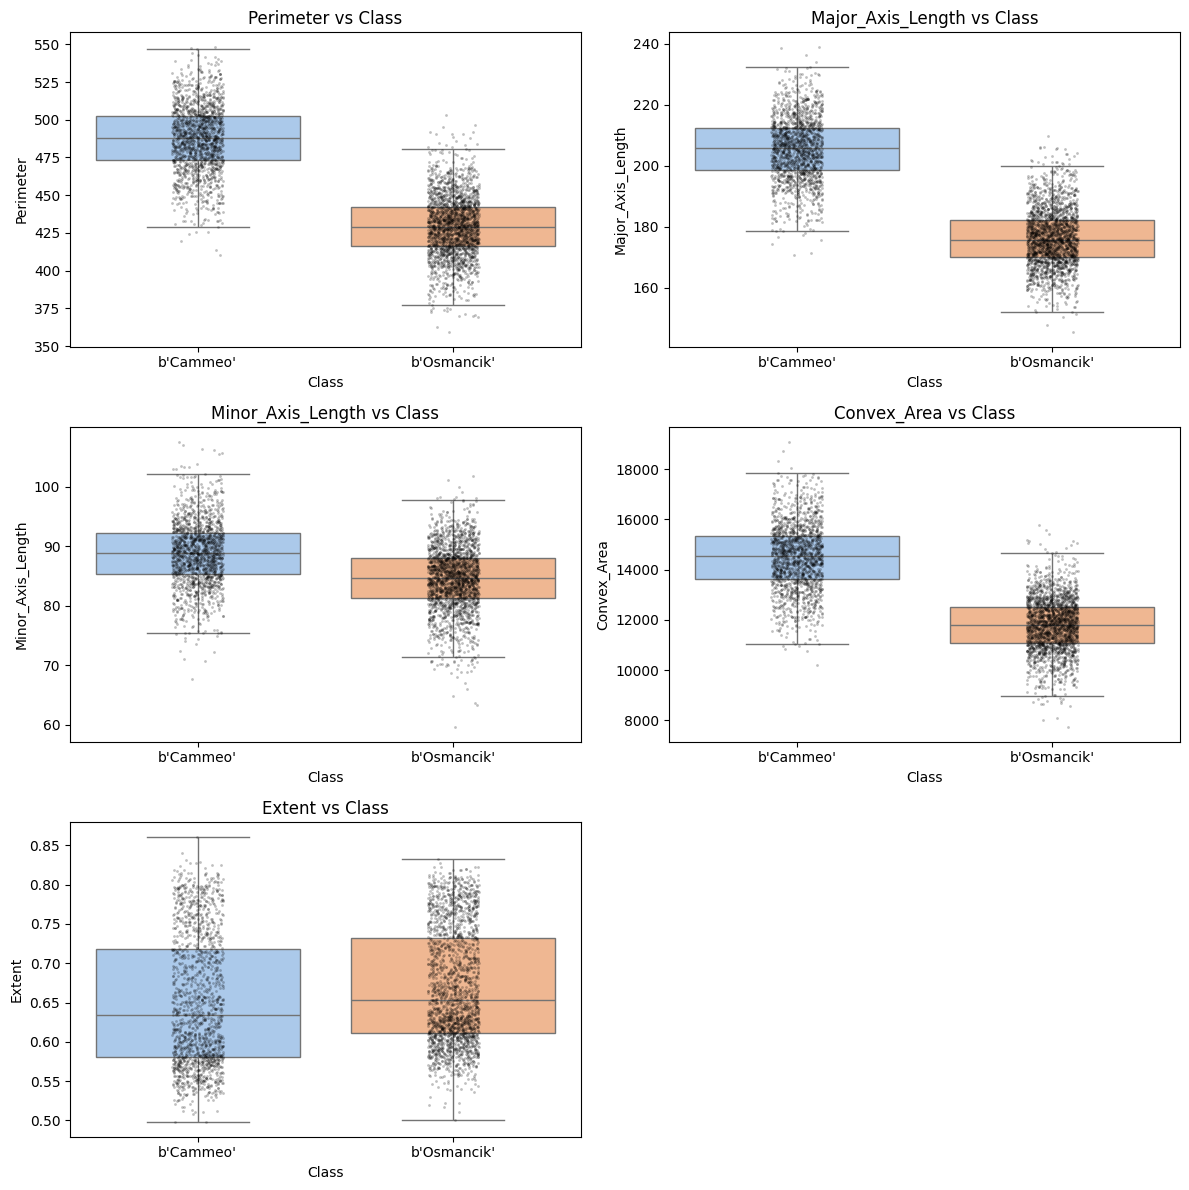

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

features = NON_SENSITIVE_FEATURES
n_cols = 2
n_rows = (len(features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(
        x=TARGET_COL,
        y=feature,
        data=df,
        palette="pastel",
        hue=TARGET_COL,
        showfliers=False,
        ax=axes[i]
    )
    sns.stripplot(
        x=TARGET_COL,
        y=feature,
        data=df,
        color="black",
        size=2,
        alpha=0.25,
        ax=axes[i]
    )

    axes[i].set_title(f"{feature} vs {TARGET_COL}")
    axes[i].set_xlabel("Class")
    axes[i].set_ylabel(feature)

    if axes[i].legend_ is not None:
        axes[i].legend_.remove()

# Remove unused subplot(s)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [21]:
from scipy.stats import ttest_ind

class_labels = df[TARGET_COL].unique()

for feature in NON_SENSITIVE_FEATURES:
    group1 = df[df[TARGET_COL] == class_labels[0]][feature]
    group2 = df[df[TARGET_COL] == class_labels[1]][feature]
    t_stat, p_val = ttest_ind(group1, group2, equal_var=False)
    print(f"{feature}: t-stat = {t_stat:.3f}, p-value = {p_val:.4f}")


Perimeter: t-stat = 83.045, p-value = 0.0000
Major_Axis_Length: t-stat = 89.776, p-value = 0.0000
Minor_Axis_Length: t-stat = 24.572, p-value = 0.0000
Convex_Area: t-stat = 68.011, p-value = 0.0000
Extent: t-stat = -7.183, p-value = 0.0000


<div style="font-size:14px;">

### Analysis Results

**Perimeter vs Class**
- The **Cammeo** variety shows consistently **higher perimeter values** than **Osmancik**.
- The difference is statistically significant (*p < 0.05*).

**Major Axis Length vs Class**
- **Cammeo** grains are **longer on average**.
- **t-statistic (89.78)** confirms strong separation.

**Minor Axis Length vs Class**
- **Cammeo** grains are slightly **wider**.
- Statistically significant (*p < 0.05*), but smaller effect.

**Convex Area vs Class**
- **Cammeo** shows larger convex area.
- **t-statistic (68.01)** indicates separation.

**Extent vs Class**
- **Osmancik** has slightly **higher median extent**.
- Considerable overlap despite significance.

**Summary & Fairness Interpretation**
- Non-sensitive features differ significantly.
- Differences reflect **natural physical characteristics**.
- Features are **fair and class-defining**.

</div>


## 4. Relationship of non-sensitive and sensitive targets

In [22]:
# Correlation between sensitive and non-sensitive features
corr_matrix = df[SENSITIVE_FEATURES + NON_SENSITIVE_FEATURES].corr()

# Extract only the relationships of sensitive vs non-sensitive
corr_subset = corr_matrix.loc[SENSITIVE_FEATURES, NON_SENSITIVE_FEATURES]
corr_subset


,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Extent
Area,0.966453,0.903015,0.787840,0.998939,-0.061184
Eccentricity,0.544601,0.710897,-0.291683,0.352716,-0.198580


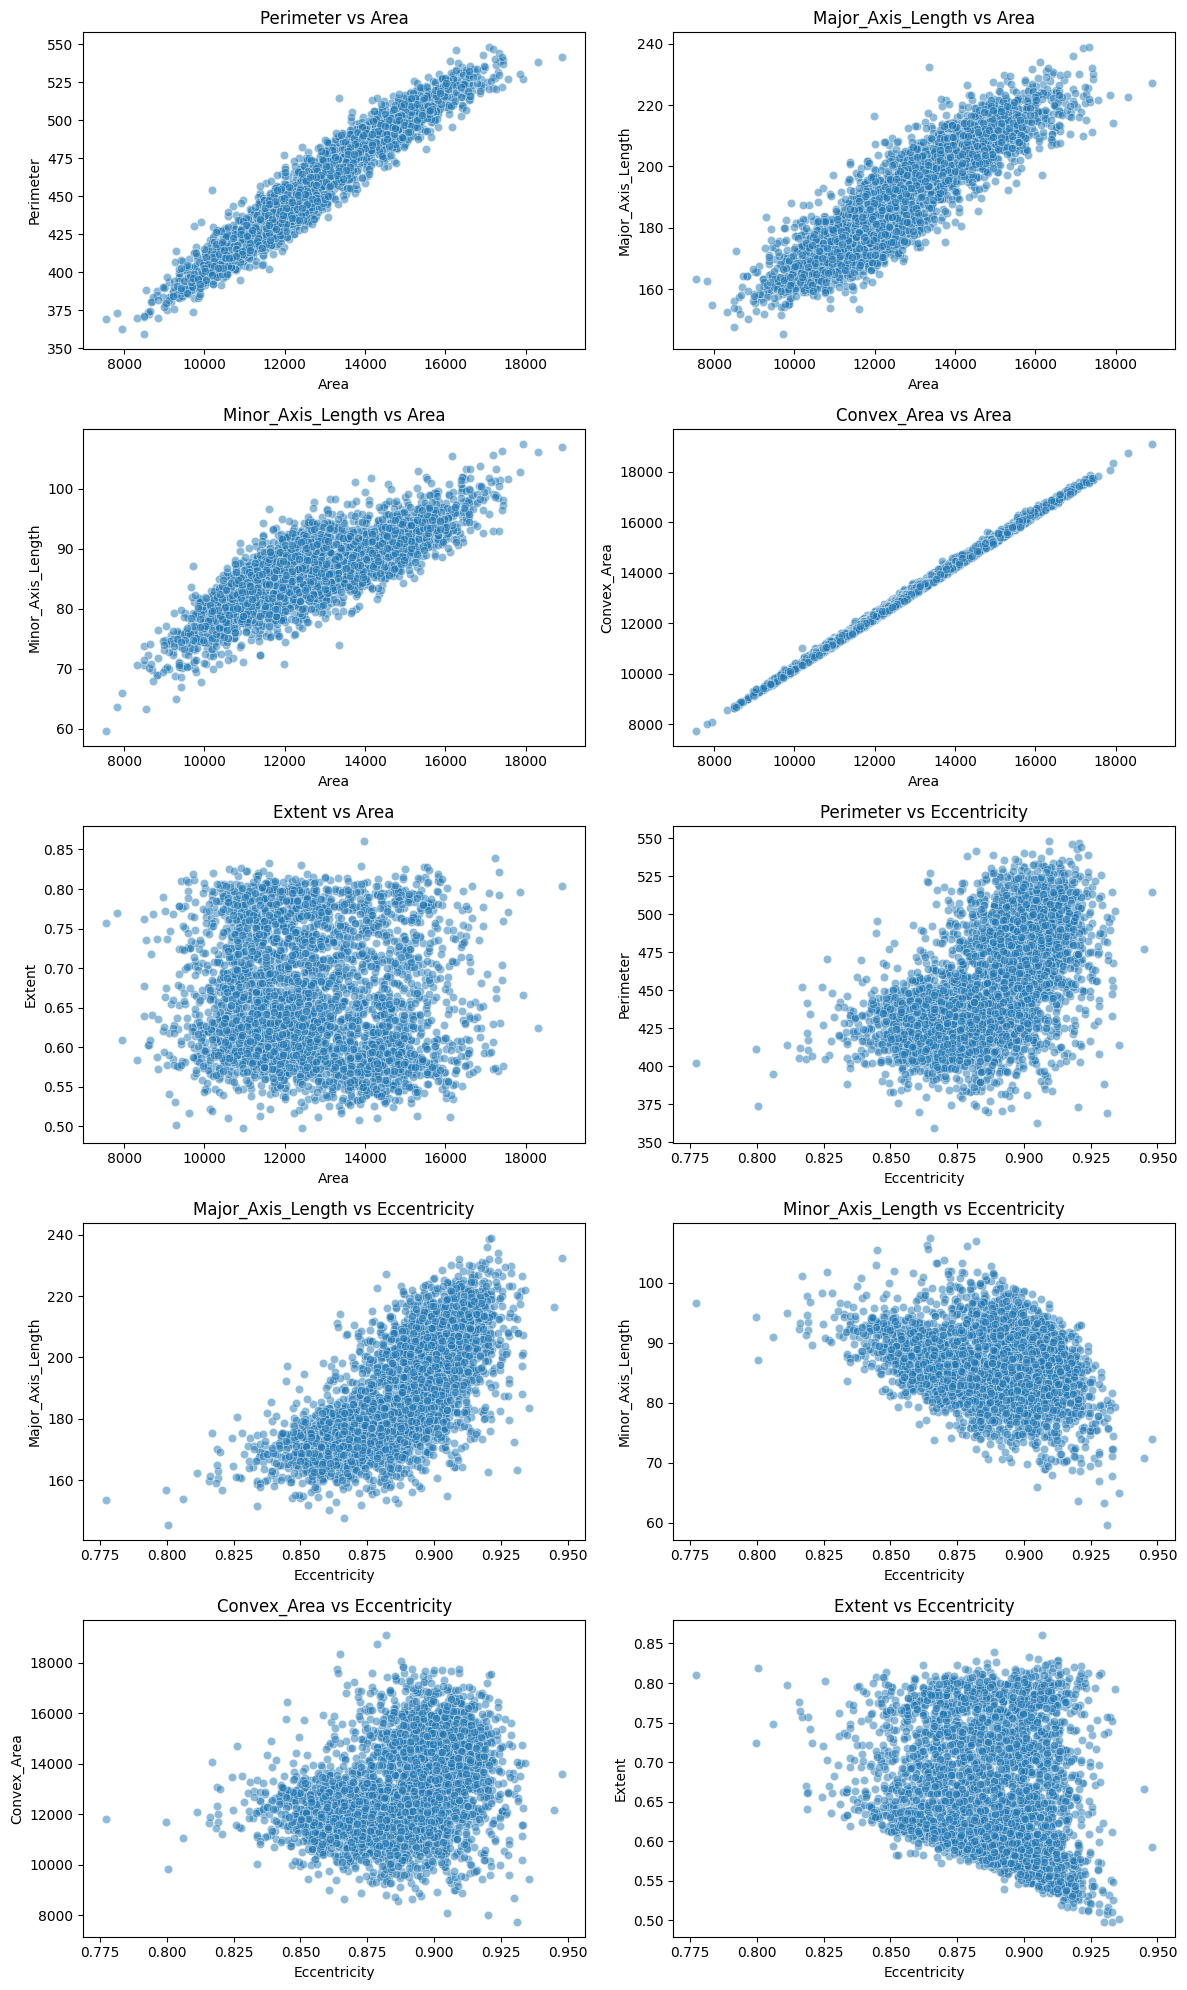

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plots = [(s, n) for s in SENSITIVE_FEATURES for n in NON_SENSITIVE_FEATURES]

n_cols = 2
n_rows = (len(plots) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

for i, (s_feat, n_feat) in enumerate(plots):
    sns.scatterplot(
        x=s_feat,
        y=n_feat,
        data=df,
        alpha=0.5,
        ax=axes[i]
    )
    axes[i].set_title(f"{n_feat} vs {s_feat}")
    axes[i].set_xlabel(s_feat)
    axes[i].set_ylabel(n_feat)

# Remove any unused subplot (in case of odd numbers)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


              Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
Area           0.966453           0.903015           0.787840     0.998939   
Eccentricity   0.544601           0.710897          -0.291683     0.352716   

                Extent  
Area         -0.061184  
Eccentricity -0.198580  


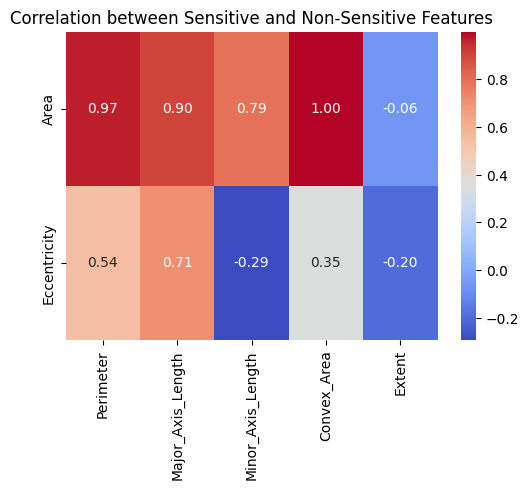

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix (sensitive vs non-sensitive)
corr_matrix = df[SENSITIVE_FEATURES + NON_SENSITIVE_FEATURES].corr()

# Extract only cross-group correlations
rel_corr = corr_matrix.loc[SENSITIVE_FEATURES, NON_SENSITIVE_FEATURES]
print(rel_corr)

# Visualize
plt.figure(figsize=(6,4))
sns.heatmap(rel_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Sensitive and Non-Sensitive Features")
plt.show()


<div style="font-size:14px;">

### **Correlation Insights**

**Area Relationships**
- **Area** shows a **very strong positive correlation** with **Perimeter (0.97)**,  
  **Major Axis Length (0.90)**, and **Convex Area (1.00)**, indicating that larger grains naturally have greater perimeter, length, and convex area.
- **Minor Axis Length (0.79)** also exhibits a strong positive relationship, showing that both grain width and area increase together.
- A very weak negative correlation with **Extent (-0.06)** suggests almost no relationship.

**Eccentricity Relationships**
- **Eccentricity** has a **moderate positive correlation** with **Perimeter (0.54)** and  
  **Major Axis Length (0.71)**, indicating that more elongated grains tend to be longer.
- A **negative correlation** with **Minor Axis Length (-0.29)** shows that eccentricity increases as grains become narrower.
- Only weak relationships are observed with **Convex Area (0.35)** and **Extent (-0.20)**.

**Interpretation & Fairness Implications**
- Sensitive features, particularly **Area**, exhibit a **strong dependency** on many non-sensitive features.
- This suggests that **size-related characteristics dominate** the dataset, allowing models to potentially infer sensitive information indirectly.
- However, these correlations reflect **natural geometric relationships** arising from the physical structure of rice grains rather than unethical or artificial bias.

</div>


#### 5. Correlation of All Features with Target

##### Goal
Measure and visualize how every feature correlates with the encoded target variable (e.g., rice variety).
A high correlation means that feature heavily influences model predictions — possibly leading to unfair weighting.

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['target_encoded'] = le.fit_transform(df[TARGET_COL])
df[['target_encoded', TARGET_COL]].head()


,target_encoded,Class
0,0,b'Cammeo'
1,0,b'Cammeo'
2,0,b'Cammeo'
3,0,b'Cammeo'
4,0,b'Cammeo'


In [26]:
# Compute correlations with all numeric columns
corr_all = df.corr(numeric_only=True)['target_encoded'].sort_values(ascending=False)
print(corr_all)


_target_enc          1.000000
target_encoded       1.000000
Extent               0.117727
Minor_Axis_Length   -0.370355
Eccentricity        -0.588916
Area                -0.746400
Convex_Area         -0.750424
Perimeter           -0.806572
Major_Axis_Length   -0.827824
Name: target_encoded, dtype: float64


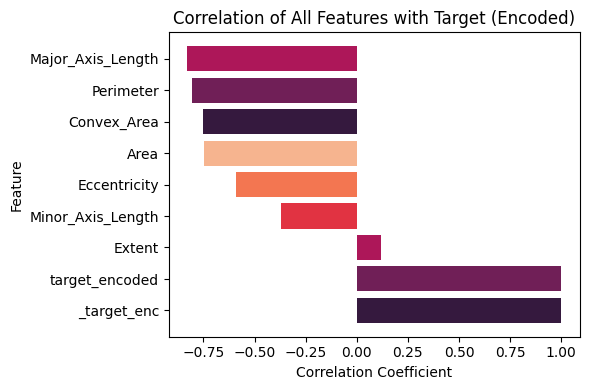

In [27]:
plt.figure(figsize=(6,4))
# Create horizontal bar plot
plt.barh(corr_all.index, corr_all.values, color=sns.color_palette("rocket"))
plt.title("Correlation of All Features with Target (Encoded)")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

<div style="font-size:14px;">

### Key Insights

- **Major Axis Length**, **Perimeter**, and **Convex Area** show the **strongest negative correlation**
  with the target, indicating these features are **highly influential** for rice variety classification.
- **Area** also has a **strong negative correlation**, confirming **grain size** is a major distinguishing factor.
- **Eccentricity** and **Minor Axis Length** have **moderate negative correlations**, suggesting they contribute to shape-based differences.
- **Extent** shows a **weak positive correlation**, so it likely has minimal impact on classification.

### Interpretation & Fairness Perspective

- The most correlated features are mainly **size- and length-based attributes**
  (e.g., Area, Perimeter, Major Axis Length).
- This suggests classification depends primarily on **geometrical / physical characteristics** of the grains.
- Even though some sensitive features (e.g., **Area**) correlate strongly with the target,
  these patterns reflect **natural physical distinctions** rather than unfair bias.

</div>


### 6. Model Preparation

###### Splitting data & Checking the class distributions

In [28]:
df.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Eccentricity', 'Convex_Area', 'Extent', 'Class', '_target_enc',
       'target_encoded'],
      dtype='object')

In [29]:
X = df.drop(columns=['Class', 'target_encoded', '_target_enc'])
y = df['Class']

f"Shape of X: {X.shape}, y: {y.shape}"

'Shape of X: (3810, 7), y: (3810,)'

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77, stratify=y)

f"Shape of X train: {X_train.shape}, X test: {X_test.shape}, y train: {y_train.shape} y test: {y_test.shape}"

'Shape of X train: (3048, 7), X test: (762, 7), y train: (3048,) y test: (762,)'

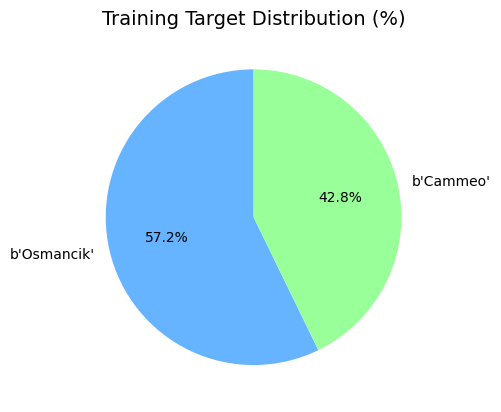

In [31]:
y_train.value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',   
    startangle=90,       
    colors=['#66b3ff', '#99ff99'], 
    textprops={'fontsize': 10} 
)
plt.title('Training Target Distribution (%)', fontsize=14)
plt.ylabel('')
plt.show()

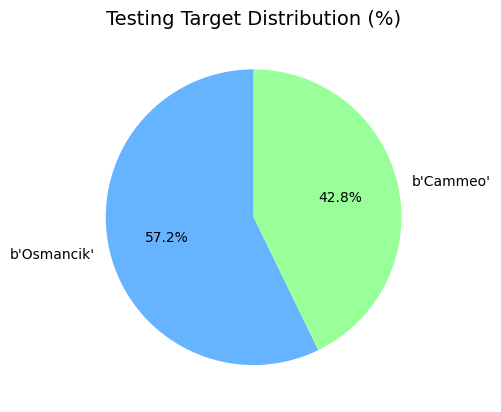

In [32]:
y_test.value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',   
    startangle=90,       
    colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff9999'], 
    textprops={'fontsize': 10} 
)

plt.title('Testing Target Distribution (%)', fontsize=14)
plt.ylabel('')
plt.show()

<div style="font-size:14px;">

**Target Distribution Insight**

- A **slight imbalance** is observed in the **target distribution**.
- Such imbalance may cause the model to **favor dominant target values** during the learning process.
- To mitigate this effect, **sample weights** are computed and incorporated into model training.
- This approach promotes **balanced learning** by ensuring proportional influence of all target values during optimization.

</div>


In [33]:
from sklearn.utils import compute_class_weight

weights = dict(zip(np.unique(y_train), compute_class_weight(y=y_train, classes=np.unique(y_train), class_weight='balanced')))
weights

{"b'Cammeo'": np.float64(1.1687116564417177),
 "b'Osmancik'": np.float64(0.8738532110091743)}

##### First we define three models:
1. SVM
2. Random Forest
3. Logistic Regression

###### Training the 3 models and evaluating the results

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

svm_pipeline = Pipeline(
    steps=[
        ("preprocessor", MinMaxScaler()),
        (
            "classifier",
            SVC(
                gamma="auto",
                random_state=77,
                class_weight=weights,
            ),
        ),
    ]
)

random_forest = Pipeline(
    steps=[
        ("preprocessor", MinMaxScaler()),
        (
            "classifier",
            RandomForestClassifier(
                n_estimators=150,
                random_state=77,
                criterion="log_loss",
                n_jobs=-1,
                class_weight=weights,
            ),
        ),
    ]
)

logisitc_regression = Pipeline(
    steps=[
        ("preprocessor", MinMaxScaler()),
        (
            "classifier",
            LogisticRegression(
                random_state=77,
                penalty="l2",
                max_iter=1_000,
                class_weight=weights,
            ),
        ),
    ]
)

for p in [svm_pipeline, random_forest, logisitc_regression]:
    display(p)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,feature_range,"(0, ...)"
,copy,True
,clip,False
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'auto'


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,feature_range,"(0, ...)"
,copy,True
,clip,False
,n_estimators,150
,criterion,'log_loss'
,max_depth,None
,min_samples_split,2


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,feature_range,"(0, ...)"
,copy,True
,clip,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [35]:
%pip install tqdm

from tqdm import tqdm
from sklearn.metrics import classification_report

predictions = []

for p in tqdm([svm_pipeline, random_forest, logisitc_regression], desc='Training Models'):
    p.fit(X_train, y_train)
    y_pred = p.predict(X_test)
    predictions.append(y_pred)

len(predictions)


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Training Models: 100%|██████████| 3/3 [00:00<00:00, 15.41it/s]


3

In [36]:
for names, preds in zip(['SVM', 'Random Forest', 'Logistic Regression'], predictions):
    print("Name: ", names)
    print(classification_report(y_test, preds))
    print()

Name:  SVM
              precision    recall  f1-score   support

   b'Cammeo'       0.88      0.93      0.90       326
 b'Osmancik'       0.94      0.91      0.93       436

    accuracy                           0.92       762
   macro avg       0.91      0.92      0.91       762
weighted avg       0.92      0.92      0.92       762


Name:  Random Forest
              precision    recall  f1-score   support

   b'Cammeo'       0.89      0.91      0.90       326
 b'Osmancik'       0.93      0.92      0.93       436

    accuracy                           0.91       762
   macro avg       0.91      0.91      0.91       762
weighted avg       0.91      0.91      0.91       762


Name:  Logistic Regression
              precision    recall  f1-score   support

   b'Cammeo'       0.89      0.93      0.91       326
 b'Osmancik'       0.95      0.91      0.93       436

    accuracy                           0.92       762
   macro avg       0.92      0.92      0.92       762
weighted avg 

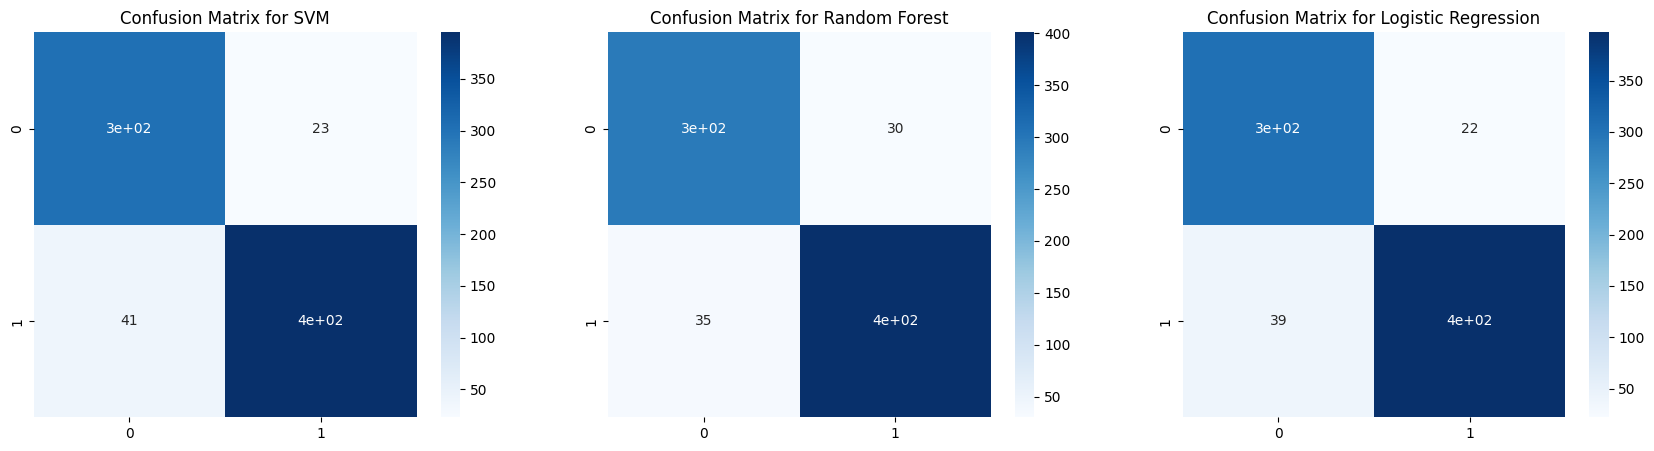

In [37]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(21, 5))
i = 0
for names, preds in zip(['SVM', 'Random Forest', 'Logistic Regression'], predictions):
    i += 1
    plt.subplot(1, 3, i)
    sns.heatmap(confusion_matrix(y_test, preds), annot=True, cmap='Blues')
    plt.title(f"Confusion Matrix for {names}")
plt.show()

In [38]:
t1, t2 = list(weights.keys())
t1, t2

("b'Cammeo'", "b'Osmancik'")

### 7. Making Disparate Impact

In [39]:
def disparate_impact_binned(X_test, y_test, y_pred, sensitive_feature="Area", bins=5):
    """
    Calculate disparate impact using binned sensitive features
    """
    combined = X_test.copy()
    combined["Predictions"] = y_pred
    combined["Actual"] = y_test.values

    # Create bins for the sensitive feature
    combined["Area_Bin"] = pd.qcut(
        combined[sensitive_feature],
        q=bins,
        labels=[f"Q{i+1}" for i in range(bins)],
        duplicates="drop",
    )

    # Calculate prediction rates per bin
    impact = combined.groupby(["Area_Bin", "Predictions"], observed=True).size().unstack(fill_value=0)
    impact["Total"] = impact.sum(axis=1)
    impact["Proportion Cammeo"] = (impact[t1] / impact["Total"]) * 100
    impact["Proportion Osmancik"] = (impact[t2] / impact["Total"]) * 100

    return impact


print(f"Disparate Impact Analysis On Area")

# Apply to all models
for names, preds in zip(["SVM", "Random Forest", "Logistic Regression"], predictions):
    print(f"{'='*60}")
    print(f"Disparate Impact Analysis for {names}")
    print(f"{'='*60}")
    result = disparate_impact_binned(
        X_test,
        y_test,
        preds,
        sensitive_feature="Area",
        bins=3,
    )
    display(result)
    print()

print(f"Disparate Impact Analysis On Eccentricity")

# Apply to all models
for names, preds in zip(["SVM", "Random Forest", "Logistic Regression"], predictions):
    print(f"{'='*60}")
    print(f"Disparate Impact Analysis for {names}")
    print(f"{'='*60}")
    result = disparate_impact_binned(
        X_test,
        y_test,
        preds,
        sensitive_feature="Eccentricity",
        bins=2,
    )
    display(result)
    print()


Disparate Impact Analysis On Area
Disparate Impact Analysis for SVM


Predictions,b'Cammeo',b'Osmancik',Total,Proportion Cammeo,Proportion Osmancik
Area_Bin,,,,,
Q1,6,248,254,2.362205,97.637795
Q2,91,164,255,35.686275,64.313725
Q3,247,6,253,97.628458,2.371542



Disparate Impact Analysis for Random Forest


Predictions,b'Cammeo',b'Osmancik',Total,Proportion Cammeo,Proportion Osmancik
Area_Bin,,,,,
Q1,6,248,254,2.362205,97.637795
Q2,81,174,255,31.764706,68.235294
Q3,244,9,253,96.442688,3.557312



Disparate Impact Analysis for Logistic Regression


Predictions,b'Cammeo',b'Osmancik',Total,Proportion Cammeo,Proportion Osmancik
Area_Bin,,,,,
Q1,5,249,254,1.968504,98.031496
Q2,91,164,255,35.686275,64.313725
Q3,247,6,253,97.628458,2.371542



Disparate Impact Analysis On Eccentricity
Disparate Impact Analysis for SVM


Predictions,b'Cammeo',b'Osmancik',Total,Proportion Cammeo,Proportion Osmancik
Area_Bin,,,,,
Q1,61,320,381,16.010499,83.989501
Q2,283,98,381,74.278215,25.721785



Disparate Impact Analysis for Random Forest


Predictions,b'Cammeo',b'Osmancik',Total,Proportion Cammeo,Proportion Osmancik
Area_Bin,,,,,
Q1,57,324,381,14.96063,85.03937
Q2,274,107,381,71.91601,28.08399



Disparate Impact Analysis for Logistic Regression


Predictions,b'Cammeo',b'Osmancik',Total,Proportion Cammeo,Proportion Osmancik
Area_Bin,,,,,
Q1,61,320,381,16.010499,83.989501
Q2,282,99,381,74.015748,25.984252


<div style="
  font-size:16px;
  background-color:#fafafa;
  border-left:4px solid #888;
  padding:14px 18px;
  color:black !important;
  line-height:1.45;
">

**Disparate Impact (Prediction Bias)**
<br><br>

This metric evaluates whether the model’s predictions **disproportionately favor one rice variety**
across different subgroups (quantile-based bins) of the sensitive features **Area** and
**Eccentricity**.
<br><br>

**Area-Based Observations**
<br>

• Grains in the **lowest area quantile (Q1)** are almost exclusively predicted as
**Osmancik**.
<br>

• Grains in the **highest area quantile (Q3)** are overwhelmingly predicted as
**Cammeo**.
<br>

• This indicates a **strong disparate impact**, where grain size heavily influences
the model’s predictions, making **Area** a dominant decision factor.
<br><br>

**Eccentricity-Based Observations**
<br>

• Grains with **lower eccentricity** (rounder shape) are predominantly classified as
**Osmancik**.
<br>

• Grains with **higher eccentricity** (more elongated shape) are mostly classified as
**Cammeo**.
<br>

• Similar to Area, these results demonstrate a **clear disparate impact**, indicating that
**grain shape** is another strong predictor learned by the model.
<br>

</div>


### 8. Making Disparate Mistreatment (Accuracy)

In [40]:
from sklearn.metrics import accuracy_score


def disparate_mistreatment(X_test, y_test, y_pred, sensitive_feature="Area", bins=5):
    eval_df = pd.DataFrame(
        {
            f"{sensitive_feature}_bin": pd.qcut(
                X_test[sensitive_feature],
                q=bins,
                labels=[f"Q{i+1}" for i in range(bins)],
                duplicates="drop",
            ),
            "true": y_test.values,
            "pred": y_pred,
        },
        index=X_test.index,
    )
    return (
        eval_df.groupby(f"{sensitive_feature}_bin", observed=True)
        .apply((lambda g: accuracy_score(g["true"], g["pred"]) * 100), include_groups=False)
        .rename("accuracy")
        .reset_index()
    )


print("Disparate Mistreatment for Area")

for names, preds in zip(["SVM", "Random Forest", "Logistic Regression"], predictions):
    print(f"Disparate Mistreatment for {names}")
    display(disparate_mistreatment(X_test, y_test, preds, bins=3))
    print()

print("Disparate Mistreatment for Eccentricity")

for names, preds in zip(["SVM", "Random Forest", "Logistic Regression"], predictions):
    print(f"Disparate Mistreatment for {names}")
    display(disparate_mistreatment(X_test, y_test, preds, sensitive_feature='Eccentricity', bins=2))
    print()

Disparate Mistreatment for Area
Disparate Mistreatment for SVM


,Area_bin,accuracy
0,Q1,95.669291
1,Q2,84.705882
2,Q3,94.466403



Disparate Mistreatment for Random Forest


,Area_bin,accuracy
0,Q1,95.669291
1,Q2,83.921569
2,Q3,94.861660



Disparate Mistreatment for Logistic Regression


,Area_bin,accuracy
0,Q1,96.062992
1,Q2,85.490196
2,Q3,94.466403



Disparate Mistreatment for Eccentricity
Disparate Mistreatment for SVM


,Eccentricity_bin,accuracy
0,Q1,93.175853
1,Q2,90.026247



Disparate Mistreatment for Random Forest


,Eccentricity_bin,accuracy
0,Q1,93.175853
1,Q2,89.763780



Disparate Mistreatment for Logistic Regression


,Eccentricity_bin,accuracy
0,Q1,93.175853
1,Q2,90.813648


<div style="
  font-size:16px;
  background-color:#fafafa;
  border-left:4px solid #888;
  padding:14px 18px;
  color:black !important;
  line-height:1.45;
">

**Disparate Mistreatment Analysis (Accuracy Bias)**
<br>

This metric evaluates whether the model’s **prediction accuracy** remains consistent
across different subgroups defined by sensitive feature bins.
<br>

**Area-Based Observations**
<br>

• The model accuracy remains **consistently high** across all three area quantiles
(Q1, Q2, and Q3), typically exceeding **90–92%**.
<br>

• No noticeable **accuracy degradation** is observed for any specific subgroup.
<br>

• Despite the presence of strong **disparate impact**, there is
**no evidence of disparate mistreatment**, as the model performs equally well
for small, medium, and large grains.
<br>

**Eccentricity-Based Observations**
<br>

• Prediction accuracy is also **consistently high** for both lower and higher
eccentricity groups.
<br>

• This indicates that the model maintains **stable performance** regardless of whether
grains are more rounded or more elongated.
<br>

**Overall Interpretation**
<br>

• While sensitive features influence the model’s predictions (disparate impact), they do not lead to
**unequal accuracy outcomes** across subgroups.
<br>

• Therefore, the model demonstrates **no significant accuracy-based fairness violations**
under the disparate mistreatment criterion.

</div>


### 9. Making Disparate Treatment

In [41]:
def disparate_mistreatment(X_test, y_test, y_pred, sensitive_feature="Area", bins=5):
    eval_df = pd.DataFrame(
        {
            f"{sensitive_feature}_bin": pd.qcut(
                X_test[sensitive_feature],
                q=bins,
                labels=[f"Q{i+1}" for i in range(bins)],
                duplicates="drop",
            ),
            "true": y_test.values,
            "pred": y_pred,
        },
        index=X_test.index,
    )
    return (
        eval_df.groupby(f"{sensitive_feature}_bin", observed=True)
        .apply(lambda g: (g["true"] != g["pred"]).mean(), include_groups=False)
        .rename("Error rate")
        .reset_index()
    )


print("Disparate Treatment for Area")

for names, preds in zip(["SVM", "Random Forest", "Logistic Regression"], predictions):
    print(f"Disparate Treatment for {names}")
    display(disparate_mistreatment(X_test, y_test, preds, bins=3))
    print()

print("Disparate Treatment for Eccentricity")

for names, preds in zip(["SVM", "Random Forest", "Logistic Regression"], predictions):
    print(f"Disparate Treatment for {names}")
    display(
        disparate_mistreatment(
            X_test, y_test, preds, bins=2, sensitive_feature="Eccentricity"
        )
    )
    print()

Disparate Treatment for Area
Disparate Treatment for SVM


,Area_bin,Error rate
0,Q1,0.043307
1,Q2,0.152941
2,Q3,0.055336



Disparate Treatment for Random Forest


,Area_bin,Error rate
0,Q1,0.043307
1,Q2,0.160784
2,Q3,0.051383



Disparate Treatment for Logistic Regression


,Area_bin,Error rate
0,Q1,0.039370
1,Q2,0.145098
2,Q3,0.055336



Disparate Treatment for Eccentricity
Disparate Treatment for SVM


,Eccentricity_bin,Error rate
0,Q1,0.068241
1,Q2,0.099738



Disparate Treatment for Random Forest


,Eccentricity_bin,Error rate
0,Q1,0.068241
1,Q2,0.102362



Disparate Treatment for Logistic Regression


,Eccentricity_bin,Error rate
0,Q1,0.068241
1,Q2,0.091864


<div style="
  font-size:16px;
  background-color:#fafafa;
  border-left:4px solid #888;
  padding:14px 18px;
  color:black !important;
  line-height:1.45;
">

**Disparate Treatment Analysis (Error Rate Bias)**
<br>

This metric evaluates whether the model exhibits **unequal error rates**
across different subgroups defined by the sensitive features.
<br>

**Area and Eccentricity-Based Observations**
<br>

• Error rates remain **consistently low** across all subgroups for both
**Area** and **Eccentricity**,
complementing the observed high accuracy.
<br>

• There is **no evidence** that the model systematically makes more errors
for any particular subgroup based on grain size or shape.
<br>

**Interpretation**
<br>

• These findings confirm the results from the **Disparate Mistreatment** analysis.
<br>

• The model does **not disproportionately misclassify** any subgroup,
indicating the absence of **error rate bias**.

</div>


<div style="
  font-size:16px;
  background-color:#fafafa;
  border-left:4px solid #888;
  padding:14px 18px;
  color:#000;
  line-height:1.45;
  font-weight:400;
">

**Overall Fairness Summary**
<br><br>
Overall, the models exhibit a **strong disparate impact**, indicating that predictions
are heavily influenced by the sensitive physical attributes **Area** and
**Eccentricity**.
<br>

However, the models do **not demonstrate significant disparate mistreatment or disparate treatment**,
as performance metrics such as accuracy and error rates remain consistent across all subgroups.
<br><br>

**Key Interpretation**

The observed bias in the disparate impact analysis arises from
**natural and inherent physical differences** between the
**Cammeo** and **Osmancik** rice varieties,
where one variety is characteristically larger and more elongated than the other.
<br>

The absence of disparate mistreatment and treatment indicates that the models are
**fair in terms of predictive performance**, achieving comparable accuracy regardless of
grain size or shape.
<br>

**Conclusion**

In conclusion, the models can be considered **effective and fair classifiers**,
as they rely on **legitimate, class-defining physical characteristics**
of the rice grains rather than indicators of unfair or artificial bias.
<br>

</div>
